# ATSC Day 32 Assignment
## Bryan Jansens

------

## 1. Use makeSkewWet to draw this cycle on a tephigram, using carnot.py and the midterm solution notebook as guidance.

Here is carnot.py:

What do I need to change?

Carnot heat engine in carnot.py starts with dry adiabatic expansion from B to C. I need moist adiabatic expansion from B to C. Use find_Td to get the dewpoint temperature with a temperature of 300 K at a relative humidity of 80%. I can use find_thetaet to find the value of the moist adiabat, and then use find_Tmoist to compute the temperature along that moist adiabat at a higher pressure level.

In [29]:
from a405thermo.thermlib import find_thetaet, find_Tmoist, find_Td, find_rsat, find_rvrl

pressA = 1.e5          #Pa
tempA = 300.0          #K
mix_ratioA = 0.01777   #kg/kg
pressB = 4.e4          #Pa

mixing_total = find_rsat(tempA, pressA)
print('The total water mixing ratio is {:.4f} kg/kg.'.format(mixing_total))

mix_resultA = find_rvrl(tempA, mixing_total, pressA)

tempdA = find_Td(mix_resultA[0]*0.80, pressA)
print('The dewpoint temperature is {:.2f} K.'.format(tempdA))

thetaetA = find_thetaet(tempdA, mixing_total, tempA, pressA)
print('The value of the equivalent potential temperature is {:.2f} K.'.format(thetaetA))
tempB = find_Tmoist(thetaetA, pressB)
print('The temperature at point B (400 hPa) is {:.2f} C.'.format(tempB - 273))

The total water mixing ratio is 0.0228 kg/kg.
The dewpoint temperature is 296.38 K.
The value of the equivalent potential temperature is 348.78 K.
The temperature at point B (400 hPa) is -12.69 C.


Note that I have lost 80% of the liquid water originally present in the parcel. Next, I want to take the air parcel over to point C, conserving the total water and leaving the pressure constant at 400 hPa while reducing the temperature by 20 K.

In [28]:
tempC = tempB - 20.0
pressC = pressB

print('The temperature at point C (400 hPa) is {:.2f} C.'.format(tempC - 273))

The temperature at point C (400 hPa) is -32.69 C.


Next, I want to descend adiabatically back to 1000 hPa, at point D, while conserving total water (i.e. mixing_total remains constant). 

In [33]:
pressD = pressA

mix_resultC = find_rvrl(tempC, mixing_total, pressC)

tempdC = find_Td(mix_resultC[0], pressC)
print('The dewpoint temperature is {:.2f} K.'.format(tempdC))

thetaetC = find_thetaet(tempdC, mixing_total, tempC, pressC)
print('The value of the equivalent potential temperature is {:.2f} K.'.format(thetaetC))
tempD = find_Tmoist(thetaetC, pressD)
print('The temperature at point D (1000 hPa) is {:.2f} C.'.format(tempD - 273))

The dewpoint temperature is 240.31 K.
The value of the equivalent potential temperature is 306.92 K.
The temperature at point D (1000 hPa) is 11.49 C.


Finally, I want to mark all of these points on a skew-T diagram.

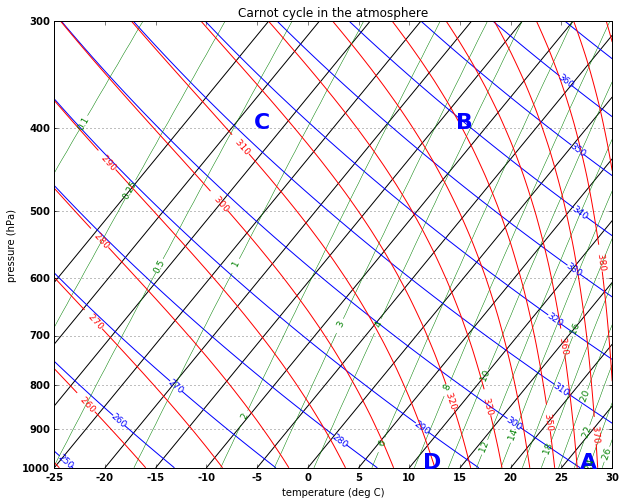

In [38]:
from a405thermo.constants import constants as c
from a405thermo.thermlib import convertTempToSkew
from a405skewT.makeSkewII import makeSkewWet
%matplotlib inline
plt.close('all')

fig,ax = plt.subplots(1,1, figsize = (10,8))
corners =  [-25,30]
ax, skew = makeSkewWet(ax, corners = corners)

xtempA = convertTempToSkew(tempA - c.Tc, pressA*0.01, skew)
xtempB = convertTempToSkew(tempB - c.Tc, pressB*0.01, skew)
xtempC = convertTempToSkew(tempC - c.Tc, pressC*0.01, skew)
xtempD = convertTempToSkew(tempD - c.Tc, pressD*0.01, skew)

ax.text(xtempA, pressA*0.01, 'A', fontweight = 'bold', fontsize = 22, color = 'b')
ax.text(xtempB, pressB*0.01, 'B', fontweight = 'bold', fontsize = 22, color = 'b')
ax.text(xtempC, pressC*0.01, 'C', fontweight = 'bold', fontsize = 22, color = 'b')
ax.text(xtempD, pressD*0.01, 'D', fontweight = 'bold', fontsize = 22, color = 'b')

xmin = convertTempToSkew(corners[0], pressA*0.01, skew)
xmax = convertTempToSkew(corners[1], pressA*0.01, skew)
ax.axis([xmin, xmax, 1000, 300])
ax.set_title('Carnot cycle in the atmosphere')
plt.show()

This looks similar to what I obtained on paper on the skew-T plot, so I think I'm at least on the right track.

## 2. Calculate the change in enthalpy at the surface and at 400 hPa, including both sensible and latent heat terms.

From the Carnot cycle notes, I know that finding the change in enthalpy $\Delta h$ at each level is equivalent to finding the heat flow $\Delta q$ for the system. Here I can compute the change in entropy between point B and point C, and between point D and point A, then use $Q=T\Delta S$ to calculate the heating. 

In [44]:
deltaS = c.cpd*(np.log(thetaetC) - np.log(thetaetA))
qin = tempB*deltaS
qout = tempA*deltaS
work_done = qin - qout
print('The change in enthalpy is {:.3f} J/kg.'.format(work_done))

h = cpT

-33469.4095619
-38572.2050541
The change in enthalpy is 5102.795 J/kg.


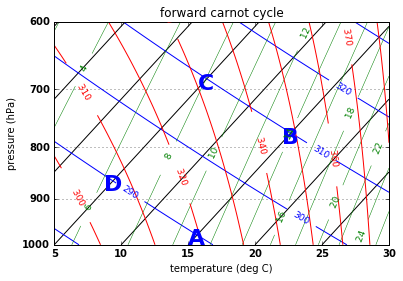

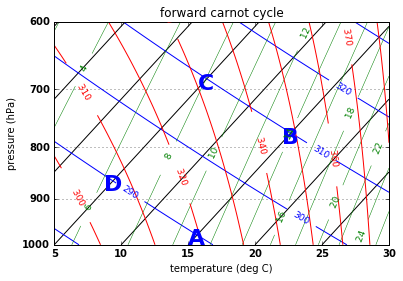

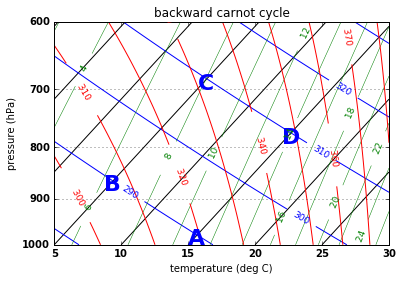

18596.5546167 19265.1346857 -668.58006891
18596.5546167 19265.1346857


In [2]:
import site
import matplotlib.pyplot as plt
import numpy as np
from a405thermo.constants import constants as c
from a405thermo.thermlib import convertTempToSkew, find_theta
from a405skewT.makeSkewII import makeSkewWet
%matplotlib inline


#Carnot heat engine:
#
#dry adiabatic expansion from B to C 
#isothermal compression from C to D (heat flow, Qout,  out of the system)
#dry adiabatic compression from D to C
#note that Qin > Qout so that work done by the system in the carnot cycle = Qin - Qout > 0

pressA=1.e5
tempA=15 + c.Tc
pressC=0.7e5
tempC=5 + c.Tc;
thetaA=find_theta(tempA,pressA)
thetaC=find_theta(tempC,pressC)
thetaB=thetaC
tempB=tempA
term1=(thetaB/tempB)**(c.cpd/c.Rd)
term1=1./term1
pressB=term1*1.e5
tempD=tempC
thetaD=thetaA
term1=(thetaD/tempD)**(c.cpd/c.Rd)
term1=1./term1
pressD=term1*1.e5

plt.close('all')
fig,ax = plt.subplots(1,1)
corners =  [5,30]
ax, skew = makeSkewWet(ax,corners=corners)

xtempA=convertTempToSkew(tempA - c.Tc,pressA*0.01,skew)
xtempB=convertTempToSkew(tempB - c.Tc,pressB*0.01,skew)
xtempC=convertTempToSkew(tempC - c.Tc,pressC*0.01,skew)
xtempD=convertTempToSkew(tempD - c.Tc,pressD*0.01,skew)

ax.text(xtempA,pressA*0.01,'A', fontweight='bold',fontsize= 22, color='b')
ax.text(xtempB,pressB*0.01,'B', fontweight='bold',fontsize= 22,color='b')
ax.text(xtempC,pressC*0.01,'C', fontweight='bold',fontsize= 22,color='b')
ax.text(xtempD,pressD*0.01,'D', fontweight='bold',fontsize= 22, color='b')

xmin = convertTempToSkew(corners[0],pressA*0.01,skew)
xmax = convertTempToSkew(corners[1],pressA*0.01,skew)
ax.axis([xmin, xmax, 1000, 600])
ax.set_title('forward carnot cycle')
plt.show()

#print -dpdf forward_carnot.pdf
#print -dpng -r200 forward_carnot.png

#Carnot refrigerator:

#adiabatic expansion from A to B 
#isothermal expansion from B to C (heat flow in, Qin, to system)
#adiabatic compression from C to D )
#isothermal compression from D to A  heat flow out, Qout, of system)
#note that Qout > Qin so that work done by the system in the carnot cycle = Qin - Qout < 0
#(i.e. work is done on the system)

thetaB=thetaA
tempB=tempC
term1=(thetaB/tempB)**(c.cpd/c.Rd)
term1=1./term1
pressB=term1*1.e5
tempD=tempA
thetaD=thetaC
term1=(thetaD/tempD)**(c.cpd/c.Rd)
term1=1./term1
pressD=term1*1.e5

fig, ax = plt.subplots(1,1)

ax, skew = makeSkewWet(ax,corners = corners)


xtempA=convertTempToSkew(tempA - c.Tc,pressA*0.01,skew)
xtempB=convertTempToSkew(tempB - c.Tc,pressB*0.01,skew)
xtempC=convertTempToSkew(tempC - c.Tc,pressC*0.01,skew)
xtempD=convertTempToSkew(tempD - c.Tc,pressD*0.01,skew)

ax.text(xtempA,pressA*0.01,'A', fontweight='bold',fontsize= 22, color='b')
ax.text(xtempB,pressB*0.01,'B', fontweight='bold',fontsize= 22,color='b')
ax.text(xtempC,pressC*0.01,'C', fontweight='bold',fontsize= 22,color='b')
ax.text(xtempD,pressD*0.01,'D', fontweight='bold',fontsize= 22, color='b')

xmin = convertTempToSkew(corners[0],pressA*0.01,skew)
xmax = convertTempToSkew(corners[1],pressA*0.01,skew)
ax.axis([xmin, xmax, 1000, 600])
ax.set_title('backward carnot cycle')
plt.show()

#print -dpdf backward_carnot.pdf
#print -dpng -r200 backward_carnot.png
#print -depsc  backward_carnot_clip.eps


#Calculate the heat input and output

#exact change in entropy
deltaS=c.cpd*(np.log(thetaC) - np.log(thetaB));
#approx change in entropy
deltaSapprox=c.cpd*(thetaC - thetaB)/thetaC;
#heat input inside the house
qin=tempB*deltaS;
#heat exausted outside the house
qout=tempA*deltaS;
work_done=qin - qout;


out_mesg='\nHeat absorbed during expansion (qin) = %8.3f (J/kg)\n\
Heat expelled during compression (qout) = %8.3f (J/kg)\n\
Work required to complete the cycle (work_done) = %8.3f (J/kg)\n\
(this is also the net energy removed from the room)\n'

print(qin, qout, work_done)

#check this using enthalpy per the carnot_refrigerator notes

qin_h= c.cpd*(tempC - tempB) - c.Rd*tempB*(np.log(pressC) - np.log(pressB))
qout_h= c.cpd*(tempD - tempA) - c.Rd*tempD*(np.log(pressD) - np.log(pressA))

out_mesg='\nEnthalpy check: heat absorbed during expansion (qin) = %8.3f (J/kg)\n\
Enthalpy check: Heat expelled during compression (qout) = %8.3f (J/kg)\n'

print(qin, qout)